<h3> Liniowe modele mieszane (zarys)

$y = X\beta + Zu +\epsilon$ (efekty stałe + efekty losowe + błąd)

gdzie:

- $u \sim N(0,\sigma_1)$, $\epsilon \sim N(0, \sigma_0)$ (na ogół mogą to być wektory)

- $Z$ - macierz eksperymentu (koduje poziomy zmiennych z użyciem zmiennych pustych)

Po co i kiedy używać?
- redukcja liczby parametrów (pewne efekty traktowane jako zmienne losowe)
- możliwie, że nie obserwujemy wszystkich możliwych poziomów zmiennej objaśniającej (problem)
- nie jesteśmy zainteresowani bezpośrednią oceną wartości efektów, a raczej zmiennością tych efeków w populacji.


Modele mieszane pozwalają uwzględnić tę hierarchiczną strukturę, stosując dwa poziomy modelowania: poziom grupy i poziom jednostkowy. Na poziomie grupy modeluje się ogólną relację między zmiennymi niezależnymi a zmienną zależną na poziomie całej populacji lub grupy. Następnie na poziomie jednostkowym modeluje się różnice między poszczególnymi jednostkami w obrębie grupy, uwzględniając skorelowanie wewnątrz grupy

Przenalizujmy dwa przykłady, które dostarczą nam pewnej intuicji.

<h4> Przykład 1

In [58]:
options(repr.plot.width=4, repr.plot.height=4)

x,y,k
1,25.202235,A
2,-10.352253,B
3,34.220171,A
4,1.222643,B
5,46.071491,A
6,9.881276,B


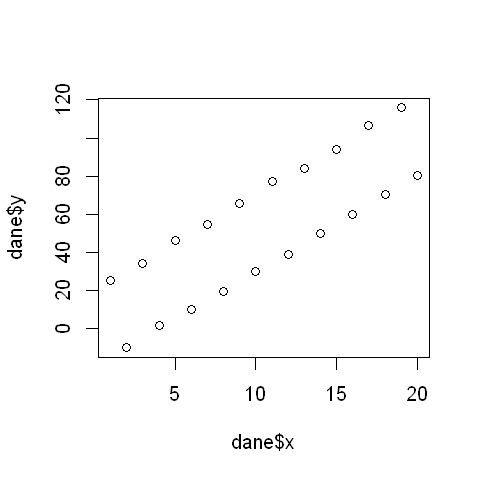

In [59]:
x = 1:20
y = 5*x+ 20*rep(c(1,-1),10)+rnorm(20)
k = rep(c("A","B"),10)
dane = data.frame(x=x, y=y, k=k)
head(dane)
plot(dane$x, dane$y)

In [3]:
summary(m <- lm(dane$y~dane$x))


Call:
lm(formula = dane$y ~ dane$x)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.1134 -19.8315  -0.4317  20.2901  23.2925 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.4594     9.8480   0.351    0.729    
dane$x        4.6755     0.8221   5.687 2.15e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.2 on 18 degrees of freedom
Multiple R-squared:  0.6425,	Adjusted R-squared:  0.6226 
F-statistic: 32.35 on 1 and 18 DF,  p-value: 2.152e-05


In [5]:
library(lme4)
summary(m <- lmer(y ~ x + (1|k), data = dane))

Linear mixed model fit by REML ['lmerMod']
Formula: dane$y ~ x + (1 | k)
   Data: dane

REML criterion at convergence: 73.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5399 -0.7382  0.1104  0.5065  1.8220 

Random effects:
 Groups   Name        Variance Std.Dev.
 k        (Intercept) 812.788  28.509  
 Residual               1.284   1.133  
Number of obs: 20, groups:  k, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   0.2766    20.1661   0.014
x             4.9787     0.0441 112.882

Correlation of Fixed Effects:
  (Intr)
x -0.023

In [6]:
fixef(m); ranef(m) #efekty stale i efekty losowe

(Intercept)           x 
  0.2766101   4.9786527

$k
  (Intercept)
A    20.15762
B   -20.15762

with conditional variances for "k" 

<h4> Przykład 2

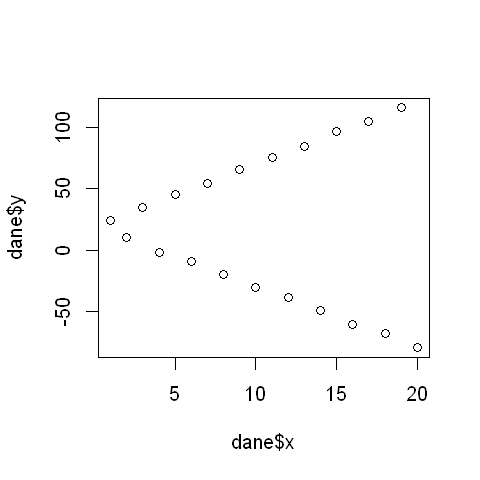

In [7]:
x = 1:20
y = 5*x*rep(c(1,-1),10)+20+ rnorm(20)
k = rep(c("A","B"),10)
dane = data.frame(x=x, y=y, k=k)
plot(dane$x, dane$y)

In [8]:
summary(m <- lmer(y~ x +(x|k), data = dane))

Linear mixed model fit by REML ['lmerMod']
Formula: dane$y ~ x + (x | k)
   Data: dane

REML criterion at convergence: 68.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.19706 -0.76876  0.01999  0.72558  1.39948 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 k        (Intercept) 9.652e-06 0.003107     
          x           4.991e+01 7.065029 0.99
 Residual             8.235e-01 0.907449     
Number of obs: 20, groups:  k, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept) 19.59241    0.42200  46.427
x            0.06569    4.99585   0.013

Correlation of Fixed Effects:
  (Intr)
x -0.001

In [9]:
fixef(m); ranef(m) #efekty stale i losowe

(Intercept)           x 
19.59240544  0.06569391

$k
  (Intercept)         x
A  0.00217126  4.995574
B -0.00217126 -4.995574

with conditional variances for "k" 

Teraz spójrzmy na dwa przykłady praktyczne.

<h4> Przykład 3

In [11]:
library(PBImisc)

In [12]:
data(milk)
head(milk) #rozwazaono 10 krów, dla kazdej krowy pomiar 4-krotny

cow,milk.amount
cow A,21.4
cow A,27.2
cow A,25.1
cow A,24.5
cow B,26.8
cow B,22.2


In [13]:
dim(milk)

[1] 40  2

In [14]:
summary(milk)

      cow      milk.amount   
 cow A  : 4   Min.   :19.40  
 cow B  : 4   1st Qu.:24.65  
 cow C  : 4   Median :27.30  
 cow D  : 4   Mean   :27.02  
 cow E  : 4   3rd Qu.:29.95  
 cow F  : 4   Max.   :32.00  
 (Other):16                  

In [15]:
mean(milk$milk.amount); var(milk$milk.amount) #wysoka wariancja? Tak, ale z punktu widzenia wszystkich danych

[1] 27.015

[1] 10.00438

In [16]:
srednie = tapply(milk$milk.amount, milk$cow, mean) #mozna tez tak: with(milk, tapply(milk.amount, cow, mean))
srednie

cow A  cow B  cow C  cow D  cow E  cow F  cow G  cow H  cow I  cow J 
24.550 24.900 28.550 26.175 22.450 24.725 27.550 30.150 30.900 30.200

In [17]:
mean(tapply(milk$milk.amount, milk$cow, var)) #srednia wariancji w obrębie grup

[1] 2.9995

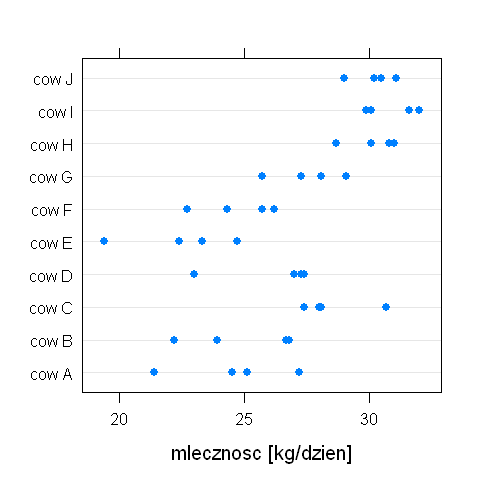

In [18]:
library(lattice)
dotplot(cow~milk.amount, data=milk, xlab="mlecznosc [kg/dzien]")

$y = \mu +Zu + \epsilon$

In [19]:
model1 = lmer(milk.amount~(1|cow), data = milk)  #(1|cow) oznacza ze będziemy uwzgledniac poziomy zmiennej 'cow' jako efekty losowe

In [20]:
summary(model1)

Linear mixed model fit by REML ['lmerMod']
Formula: milk.amount ~ (1 | cow)
   Data: milk

REML criterion at convergence: 178.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9981 -0.4136  0.1775  0.6561  1.4021 

Random effects:
 Groups   Name        Variance Std.Dev.
 cow      (Intercept) 7.589    2.755   
 Residual             2.999    1.732   
Number of obs: 40, groups:  cow, 10

Fixed effects:
            Estimate Std. Error t value
(Intercept)  27.0150     0.9132   29.58

- $\mu = 27.0150$ (efekt stały średniej),

- $\sigma_{1}^{2} = 7.589$ (wariancja efektów losowych) 

- $\sigma_{0}^{2} = 2.999$ (wariancja zakłócenia losowego)

In [21]:
fixef(model1); ranef(model1) #porownac z wynikiem tapply wyzej, np 27.015-2.243 = 24.772 ~ 24.55

(Intercept) 
     27.015

$cow
      (Intercept)
cow A  -2.2433244
cow B  -1.9247997
cow C   1.3969586
cow D  -0.7644594
cow E  -4.1544730
cow F  -2.0840620
cow G   0.4868879
cow H   2.8530718
cow I   3.5356249
cow J   2.8985754

with conditional variances for "cow" 

In [22]:
model2 = lm(milk.amount~cow, data=milk) #model ze stalym efektem krowy
summary(model2)


Call:
lm(formula = milk.amount ~ cow, data = milk)

Residuals:
   Min     1Q Median     3Q    Max 
-3.175 -1.000  0.150  1.006  2.650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   24.550      0.866  28.350  < 2e-16 ***
cowcow B       0.350      1.225   0.286  0.77700    
cowcow C       4.000      1.225   3.266  0.00273 ** 
cowcow D       1.625      1.225   1.327  0.19455    
cowcow E      -2.100      1.225  -1.715  0.09670 .  
cowcow F       0.175      1.225   0.143  0.88733    
cowcow G       3.000      1.225   2.450  0.02035 *  
cowcow H       5.600      1.225   4.573 7.76e-05 ***
cowcow I       6.350      1.225   5.185 1.38e-05 ***
cowcow J       5.650      1.225   4.614 6.92e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.732 on 30 degrees of freedom
Multiple R-squared:  0.7694,	Adjusted R-squared:  0.7002 
F-statistic: 11.12 on 9 and 30 DF,  p-value: 2.161e-07


In [23]:
model2$coef

(Intercept)    cowcow B    cowcow C    cowcow D    cowcow E    cowcow F 
     24.550       0.350       4.000       1.625      -2.100       0.175 
   cowcow G    cowcow H    cowcow I    cowcow J 
      3.000       5.600       6.350       5.650

In [24]:
ocena_m1 = unlist(ranef(model1))+unlist(fixef(model1))
ocena_m2 = c(0, model2$coef[-1])+model2$coef[1]

cbind(srednie, ocena_m2, ocena_m1) #w modelu stalym srednie są identyczne, w modelu mieszanym nieco sciągniete w strone sredniej (27)

,srednie,ocena_m2,ocena_m1
cow A,24.550,24.550,24.77168
cow B,24.900,24.900,25.09020
cow C,28.550,28.550,28.41196
cow D,26.175,26.175,26.25054
cow E,22.450,22.450,22.86053
cow F,24.725,24.725,24.93094
cow G,27.550,27.550,27.50189
cow H,30.150,30.150,29.86807
cow I,30.900,30.900,30.55062
cow J,30.200,30.200,29.91358


Efekty losowe z przedziałami ufności

$cow


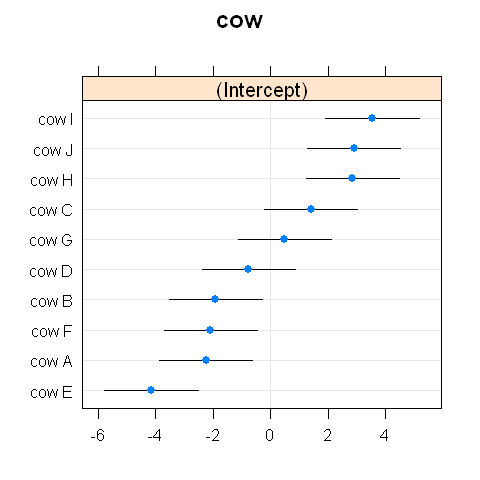

In [25]:
u = ranef(model1, condVar = TRUE)
library(lattice)
dotplot(u) #predykcje efektow losowych z przedzialami ufnosci

<h4> Przykład 4

In [26]:
library(PBImisc)
data(milkgene)
head(milkgene) #gen btn3a1 wystepuje w wersjach 1 i 2

cow.id,btn3a1,lactation,milk,fat
1,1,1,7770,358
2,1,1,7341,376
3,1,1,6998,294
3,1,2,8564,331
3,1,3,8621,330
4,1,1,9536,365


In [27]:
str(milkgene)

'data.frame':	1000 obs. of  5 variables:
 $ cow.id   : int  1 2 3 3 3 4 4 4 5 5 ...
 $ btn3a1   : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ lactation: Factor w/ 4 levels "1","2","3","4": 1 1 1 2 3 1 2 3 1 2 ...
 $ milk     : int  7770 7341 6998 8564 8621 9536 7950 8570 9453 11004 ...
 $ fat      : int  358 376 294 331 330 365 331 322 339 407 ...


In [28]:
summary(milkgene)

     cow.id      btn3a1  lactation      milk            fat       
 Min.   :  1.0   1:915   1:409     Min.   : 1708   Min.   : 85.0  
 1st Qu.: 83.0   2: 85   2:334     1st Qu.: 6320   1st Qu.:262.0  
 Median :206.5           3:202     Median : 7379   Median :298.5  
 Mean   :216.1           4: 55     Mean   : 7525   Mean   :300.3  
 3rd Qu.:341.2                     3rd Qu.: 8653   3rd Qu.:338.0  
 Max.   :465.0                     Max.   :13442   Max.   :713.0  

In [29]:
tapply(milkgene$milk, milkgene$btn3a1, mean) #krowy z wersją 1 i 2 genu BTN3A1 

1        2 
7542.517 7336.082

In [30]:
7542.51693989071-7336.08235294118

[1] 206.4346

<h4> Zadanie1: Czy możemy zastosować tutaj test t-studenta aby porównać mutacje genu BTN3A1? Uzasadnij odpowiedź.

In [31]:
model1 = lmer(milk~btn3a1+lactation+(1|cow.id), data=milkgene, REML = F)
print(summary(model1))

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: milk ~ btn3a1 + lactation + (1 | cow.id)
   Data: milkgene

     AIC      BIC   logLik deviance df.resid 
 17374.3  17408.7  -8680.2  17360.3      993 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6389 -0.5390  0.0281  0.5518  3.2189 

Random effects:
 Groups   Name        Variance Std.Dev.
 cow.id   (Intercept) 1233594  1111    
 Residual             1246884  1117    
Number of obs: 1000, groups:  cow.id, 409

Fixed effects:
            Estimate Std. Error t value
(Intercept)  6699.44      80.87  82.846
btn3a12      -244.05     234.50  -1.041
lactation2   1307.06      84.43  15.481
lactation3   1800.51     101.85  17.677
lactation4   1669.17     176.02   9.483

Correlation of Fixed Effects:
           (Intr) btn312 lcttn2 lcttn3
btn3a12    -0.269                     
lactation2 -0.454  0.029              
lactation3 -0.374  0.015  0.395       
lactation4 -0.214  0.000  0.228  0.234


<h4> Zadanie2: Efekt genu BTN3A1 został oceniony na -244.05. Czy ten efekt można uznać za istotny? Pomocne może też być zbudowanie alternatywnego modelu i użycie anova.

Szybka diangostyka

$cow.id


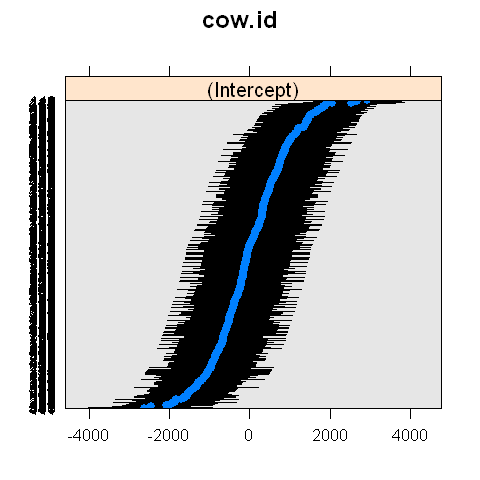

In [32]:
u = ranef(model1, condVar = TRUE)
library(lattice)
dotplot(u) #predykcje efektow losowych z przedzialami ufnosci

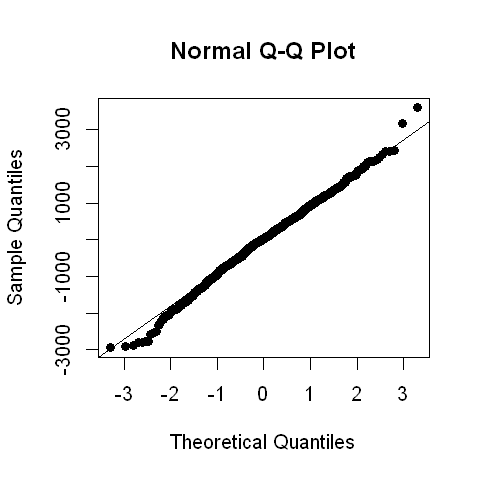

In [33]:
e = residuals(model1) #roznice miedzy predykcją a wartoscią
qqnorm(e, pch=16)
qqline(e)

In [34]:
Z = model.matrix(~factor(cow.id)-1, milkgene)
head(Z)

factor(cow.id)1,factor(cow.id)2,factor(cow.id)3,factor(cow.id)4,factor(cow.id)5,factor(cow.id)6,factor(cow.id)7,factor(cow.id)8,factor(cow.id)9,factor(cow.id)10,...,factor(cow.id)456,factor(cow.id)457,factor(cow.id)458,factor(cow.id)459,factor(cow.id)460,factor(cow.id)461,factor(cow.id)462,factor(cow.id)463,factor(cow.id)464,factor(cow.id)465
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


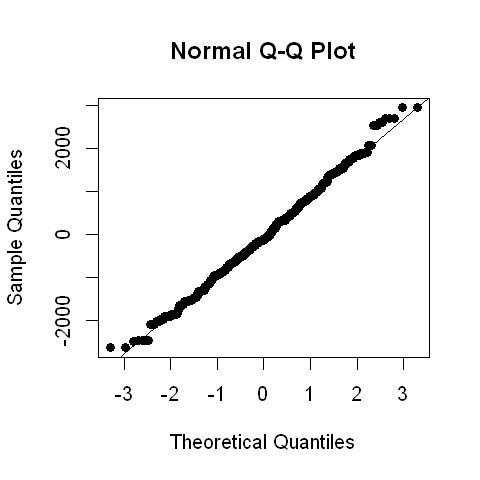

In [35]:
ue = Z %*%u[[1]][[1]] #efekty losowe dla kazdej obserwacji
qqnorm(ue, pch=16)
qqline(ue)

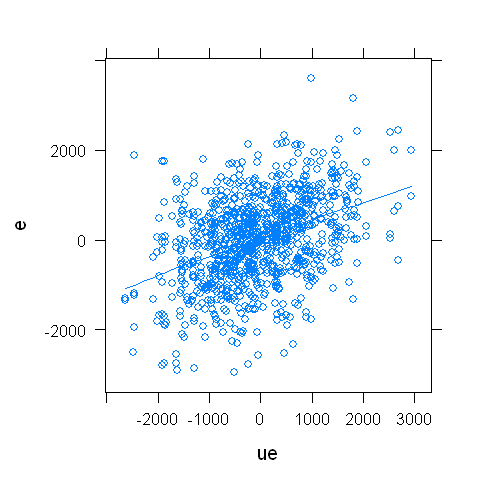

In [36]:
xyplot(e~ue, type = c("p", "smooth"))

In [37]:
cor(e, ue) #predykcje efektu losowego są nieznacznie skorelowane z wartosciami reszt (powinny byc niezalezne)

0.3925
